# Merging Ordered and Time-Series Data
**In this final chapter, you’ll step up a gear and learn to apply pandas' specialized methods for merging time-series and ordered data together with real-world financial and economic data from the city of Chicago. You’ll also learn how to query resulting tables using a SQL-style format, and unpivot data using the melt method.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Correlation between GDP and S&P500
In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

In [24]:
sp500 = pd.read_csv('S&P500.csv')
US_gdp = pd.read_pickle('US_gdp.p')

**Instruction 1**

- Use `merge_ordered()` to merge `gdp` and `sp500` using a left join on `year` and `Date`. Save the results as `gdp_sp500`.
- Print `gdp_sp500` and look at the returns for the `year 2018`.

In [25]:
# Use merge_ordered() to merge gdp and sp500 on year and Date
gdp_sp500 = pd.merge_ordered(US_gdp, sp500, left_on='year'
                             , right_on='Date', how='left')

# Print gdp_sp500
gdp_sp500

,country code,year,gdp,Date,Returns
0,USA,2010,1.499210e+13,2010.0,12.78
1,USA,2011,1.554260e+13,2011.0,0.00
2,USA,2012,1.619700e+13,2012.0,13.41
3,USA,2012,1.619700e+13,2012.0,13.41
4,USA,2013,1.678480e+13,2013.0,29.60
5,USA,2014,1.752170e+13,2014.0,11.39
6,USA,2015,1.821930e+13,2015.0,-0.73
7,USA,2016,1.870720e+13,2016.0,9.54
8,USA,2017,1.948540e+13,2017.0,19.42
9,USA,2018,2.049410e+13,NaN,NaN


**Instuction 2**

- Use `merge_ordered()`, again similar to before, to merge `gdp` and `sp500` use the function's ability to interpolate missing data to forward fill the missing value for returns, assigning this table to the variable `gdp_sp500`.

In [26]:
# Use merge_ordered() to merge gdp and sp500, interpolate missing value
gdp_sp500 = pd.merge_ordered(US_gdp, sp500, left_on='year', right_on='Date'
                             , how='left', fill_method='ffill')

# Print gdp_sp500
gdp_sp500

,country code,year,gdp,Date,Returns
0,USA,2010,1.499210e+13,2010,12.78
1,USA,2011,1.554260e+13,2011,0.00
2,USA,2012,1.619700e+13,2012,13.41
3,USA,2012,1.619700e+13,2012,13.41
4,USA,2013,1.678480e+13,2013,29.60
5,USA,2014,1.752170e+13,2014,11.39
6,USA,2015,1.821930e+13,2015,-0.73
7,USA,2016,1.870720e+13,2016,9.54
8,USA,2017,1.948540e+13,2017,19.42
9,USA,2018,2.049410e+13,2017,19.42


**Instruction 3**
- Subset the `gdp_sp500` table, select the `gdp` and `returns` columns, and save as `gdp_returns`.
- Print the correlation matrix of the `gdp_returns` table.

In [27]:
# Subset the gdp and returns columns
gdp_returns = gdp_sp500[['gdp', 'Returns']]

# Print gdp_returns correlation
gdp_returns.corr()

,gdp,Returns
gdp,1.000000,0.212173
Returns,0.212173,1.000000


*The correlation of 0.21 between the GDP and S&P500 is low to moderate at best.*

## Phillips curve using `merge_ordered()`
There is an economic theory developed by *A. W. Phillips* which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

In [19]:
unemployment = pd.read_pickle('unemployment.p')
inflation = pd.read_pickle('inflation.p')

In [20]:
unemployment.head(1)

,date,unemployment_rate
0,2013-06-01,7.5


In [21]:
inflation.head(1)

,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


- Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on `date` with an inner join, and save the results as `inflation_unemploy`.
- Print the `inflation_unemploy` variable.

In [22]:
# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation, unemployment, on='date'
                                      , how='inner', fill_method='ffill')

# Print inflation_unemploy 
inflation_unemploy

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0
5,2016-06-01,240.167,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.9
6,2017-01-01,243.780,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.7
7,2017-06-01,244.182,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.3
8,2018-01-01,248.884,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.1
9,2018-06-01,251.134,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,4.0


- Using `inflation_unemploy`, create a *scatter plot* with `unemployment_rate` on the horizontal axis and `cpi` (inflation) on the vertical axis.

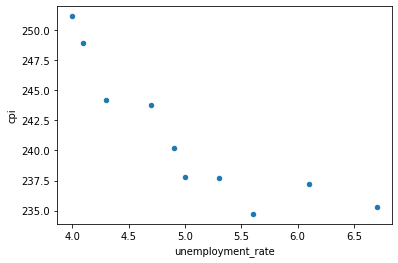

In [23]:
# Plot a scatter plot of unemployment_rate vs cpi of inflation_unemploy
inflation_unemploy.plot('unemployment_rate', 'cpi', kind='scatter')
plt.show()

## `merge_ordered()` caution, multiple columns
When using `merge_ordered()` to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for the Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

In [31]:
gdp = pd.read_pickle('gdp.p')
pop = pd.read_pickle('population.p')

In [32]:
gdp.head(1)

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD


In [33]:
pop.head(1)

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL


**Instruction 1**
- Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date` and `country` with the fill feature, save to `ctry_date`.

In [38]:
# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(gdp, pop, on=['date', 'country'], fill_method='ffill')

ctry_date

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.84599,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.28597,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
5,1990-07-01,Sweden,79974.36017,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
6,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
7,1990-09-01,Sweden,80106.49738,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
8,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
9,1991-01-01,Sweden,79524.24192,NYGDPMKTPSAKD,8617375,SP.POP.TOTL


**Instruction 2**
- Perform the same merge of `gdp` and `pop`, but join on `country` and `date` (**reverse of instruction 1**) with the fill feature, saving this as `date_ctry`.

In [39]:
# Merge gdp and pop on country and date with fill
ctry_date = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')

ctry_date

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.13240,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-04-01,Australia,158263.58160,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
2,1990-07-01,Australia,157329.27900,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
3,1990-09-01,Australia,158240.67810,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
4,1991-01-01,Australia,156195.95350,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
5,1991-04-01,Australia,155989.03270,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
6,1991-07-01,Australia,156635.85760,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
7,1991-09-01,Australia,156744.05660,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
8,1992-01-01,Australia,157916.08110,NYGDPMKTPSAKD,17495000,SP.POP.TOTL
9,1992-04-01,Australia,159047.82710,NYGDPMKTPSAKD,17495000,SP.POP.TOTL


*When merging on `date` first, the table is sorted by `date` then `country`. When forward fill is applied, Sweden's population value in January is used to fill in the missing values for both Australia and the Sweden for the remainder of the year. This is not what we want. The fill forward is using unintended data to fill in the missing values. **However**, when merging on `country` first, the table is sorted by `country` then `date`, so the forward fill is applied appropriately in this situation.*

## Using `merge_asof()` to study stocks
You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, *JP Morgan* (JPM), *Wells Fargo* (WFC), and *Bank Of America* (BAC). You want to know how the price change of the two other banks compare to *JP Morgan*. Therefore, you will need to merge these three logs into one table. Afterward, you will use the `pandas` `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

In [43]:
jpm = pd.read_pickle('jpm.p')
wells = pd.read_pickle('wells.p')
bac = pd.read_pickle('bac.p')

- Use `merge_asof()` to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the **nearest times** are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.

In [45]:
# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time'
                          , suffixes=('', '_wells')
                          , direction='nearest')

- Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.

In [46]:
# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time'
                              , suffixes=('_jpm', '_bac')
                              , direction='nearest')

- Using `price_diffs`, create a line plot of the close price of JPM, WFC, and BAC only.

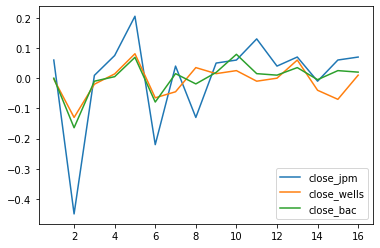

In [47]:
# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm', 'close_wells', 'close_bac'])
plt.show()

*The price change for these bank stocks was roughly the same, although the price change for JP Morgan was more variable.* 

- The critical point here is that the `merge_asof()` function is very useful in performing the fuzzy matching between the timestamps of all the tables.

## Using `merge_asof()` to create dataset
The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. There is `gdp_80`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession_80` has been given. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

In [51]:
gdp_80 = pd.read_pickle('gdp_80.p')
recession_80 = pd.read_pickle('recession_80.p')

- Using `merge_asof()`, merge `gdp_80` and `recession_80` on `date`, with `gdp` as the left table. Save to the variable `gdp_recession`.

In [53]:
# Merge gdp_80 and recession_80 on date using merge_asof()
gdp_recession = pd.merge_asof(gdp_80, recession_80, on='date')

- Create a `list` using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to 'recession' then enter `'r'` else `'g'`.

In [54]:
# Create a list based on the row value of gdp_recession['econ_status']
is_recession = ['r' if s=='recession' else 'g' for s in gdp_recession['econ_status']]

- Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the `color` argument equal to `is_recession`.

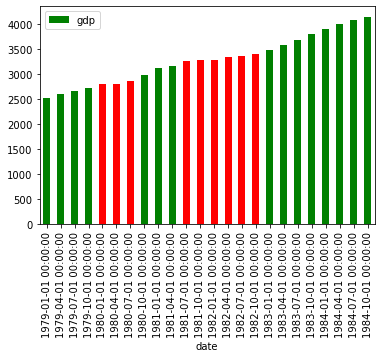

In [57]:
# Plot a bar chart of gdp_recession
gdp_recession.plot(kind='bar', y='gdp', x='date'
                   ,color=is_recession, rot=90)
plt.show()

*There were a number of quarters early in the 1980s where a recession was an issue.*
- `merge_asof()` allowed us to quickly add a flag to the `gdp_80` dataset by matching between two different dates, in one line of code. If we were to perform the same task using subsetting, it would have taken a lot more code.

## `merge_asof()` and `merge_ordered()` differences
The `merge_asof()` and `merge_ordered()` functions are similar in the type of merge they perform and the input arguments they use. 

`merge_asof()` | both | `merge_ordered()`
:---|:---|:---
Atfer matching two tables, if there are missing values at the top of the table from the right table, this functin can fill them in. | Can be used when working with orderd or time-series data. | If it cannot match the rows of the tables exactly, it can use forward fill to interpolate the missing data.
Has and argument that can be set to `'forward'` to select the first row in the righr table whose key column is greater than or equal to the left's | Can set the suffix for overlapping column names. | Allows for a right join during the merge.
Can be used to do fuzzy matching of dates between tables. | |

## Subsetting rows with `.query()`
In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

In [58]:
gdp.head(1)

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.1324,NYGDPMKTPSAKD


In [59]:
pop.head(1)

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL


- Use `merge_ordered()` on `gdp` and `pop` on columns `country` and `date` with the fill feature, save to `gdp_pop`.

In [62]:
# Merge gdp and pop on date and country with fill
gdp_pop = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')

- Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by `pop`.

In [63]:
# Add a column named gdp_per_capita to gdp_pop that divides the gdp by pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

- Pivot `gdp_pop` so `values='gdp_per_capita'`, `index='date'`, and `columns='country'`, save as `gdp_pivot`.

In [64]:
# Pivot table of gdp_per_capita, where index is date and columns is country
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')

- Use `.query()` to select rows from `gdp_pivot` where `date` is greater than equal to `"1991-01-01"`. Save as `recent_gdp_pop`.

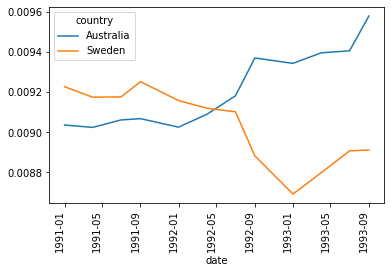

In [65]:
# Select dates equal to or greater than 1991-01-01
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')

# Plot recent_gdp_pop
recent_gdp_pop.plot(rot=90)
plt.show()

*We can see from the plot that the per capita GDP of Australia passed Sweden in 1992.*
- By using the `.query()` method, We were able to select the appropriate rows easily. The `.query()` method is easy to read and straightforward.

## Using `.melt()` to reshape government data
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a date column to the table and sort by it to plot the data correctly.

In [69]:
ur_wide = pd.read_pickle('ur_wide.p')
ur_wide.head(2)

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5


- Use `.melt()` to unpivot all of the columns of `ur_wide` except `year` and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.

In [70]:
# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars='year', var_name='month', value_name='unempl_rate')

- Add a column to `ur_tall` named `date` which combines the `year` and `month` columns as *year-month* format into a larger string, and converts it to a date data type.

In [71]:
# Create a date column using the month and year columns of ur_tall
ur_tall['date'] = pd.to_datetime(ur_tall['year'] + '-' + ur_tall['month'])

- Sort `ur_tall` by `date` and save as `ur_sorted`.
- Using `ur_sorted`, plot `unempl_rate` on the y-axis and `date` on the x-axis.

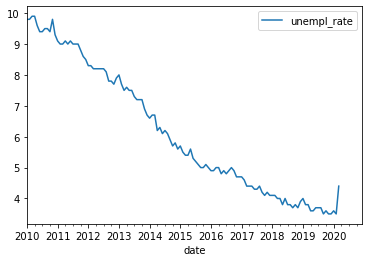

In [72]:
# Sort ur_tall by date in ascending order
ur_sorted = ur_tall.sort_values('date')

# Plot the unempl_rate by date
ur_sorted.plot('date', 'unempl_rate', kind='line')
plt.show()

*The plot shows a steady decrease in the unemployment rate with an increase near the end. This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy.*
- In general, data is often provided (*especially by governments*) in a format that is easily read by people but not by machines. The `.melt()` method is a handy tool for reshaping data into a useful form.

## Using `.melt()` for stocks vs bond performance
It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

In [77]:
ten_yr = pd.read_pickle('ten_yr.p')
dji = pd.read_pickle('dji.p')

- Use `.melt()` on `ten_yr` to unpivot everything except the `metric` column, setting `var_name='date'` and `value_name='close'`. Save the result to `bond_perc`.

In [78]:
# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars='metric', var_name='date', value_name='close')

- Using the `.query()` method, select only those rows were `metric` equals `'close'`, and save to `bond_perc_close`.

In [79]:
# Use query on bond_perc to select only the rows where metric=close
bond_perc_close = bond_perc.query('metric == "close"')

- Use `merge_ordered()` to merge `dji` (left table) and `bond_perc_close` on `date` with an inner join, and set `suffixes` equal to `('_dow', '_bond')`. Save the result to `dow_bond`.
- Using `dow_bond`, plot only the Dow and bond values.

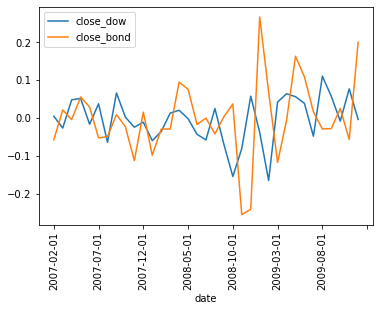

In [80]:
# Merge (ordered) dji and bond_perc_close on date with an inner join
dow_bond = pd.merge_ordered(dji, bond_perc_close, on='date'
                            , how='inner', suffixes=('_dow', '_bond'))

# Plot only the close_dow and close_bond columns
dow_bond.plot(y=['close_dow', 'close_bond'], x='date', rot=90)
plt.show()

*The plot confirms that the bond and stock prices are inversely correlated. Often as the price of stocks increases, the price for bonds decreases.*